In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#reading csv file
df = pd.read_csv('student life data.csv')
df

,Timestamp,Username,University,Degree,Avg_Attendance,Avg_Study_time_per_day,Extracurricular_Activities,Avg_sleep_time,Household_Size,Workout,Free_time_Activity,University_society_member,Parents_Highest_Qaulification,GPA
0,2023/11/22 9:12:38 PM GMT+5,rayyanlaeeq@gmail.com,Fast,AI,90% - 100%,NaN,Sports,5-7 hours,5-6 members,"Yes, regularly",Reading,No,Master's Degree,3.0 - 3.9
1,2023/11/23 8:25:45 PM GMT+5,NaN,Fast NU,BS AI,90% - 100%,NaN,Sports,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,Yes,Master's Degree,3.0 - 3.9
2,2023/11/23 8:25:48 PM GMT+5,NaN,FAST-NU,BS-AI,90% - 100%,NaN,Gaming,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,No,Master's Degree,3.0 - 3.9
3,2023/11/24 12:47:21 PM GMT+5,NaN,Fast,Bscs,80%-90%,5-6 hours,Academic Clubs,5-7 hours,3-4 members,Occasionally,Watching TV/Movies,Yes,Bachelor's Degree,2.0 - 2.9
4,2023/11/24 3:03:49 PM GMT+5,NaN,Fast,Artificial intelligence,80%-90%,1-2 hours,Sports,5-7 hours,5-6 members,"No, I don't",Watching TV/Movies,No,Master's Degree,3.0 - 3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2023/12/06 3:43:42 PM GMT+5,NaN,University of Karachi.,MSc in Geography.,90% - 100%,1-2 hours,Arts and Culture;Volunteer Work,7-9 hours,7 or more members,"No, I don't",Reading,No,High School Diploma or Below,3.0 - 3.9
205,2023/12/07 11:41:34 AM GMT+5,NaN,FAST,Bs Artificial Intelligence,80%-90%,3-4 hours,Sports,5-7 hours,5-6 members,"No, I don't",Socializing with Friends,No,Master's Degree,2.0 - 2.9
206,2023/12/07 11:41:54 AM GMT+5,NaN,Fast,Artificial Intelligence,80%-90%,1-2 hours,Academic Clubs,Less than 5 hours,5-6 members,"No, I don't",Watching TV/Movies,Yes,High School Diploma or Below,3.0 - 3.9
207,2023/12/07 12:38:18 PM GMT+5,NaN,Iqra University,Bs-Computer Science,90% - 100%,Less than 1 hour,Sports,5-7 hours,3-4 members,"Yes, regularly",Socializing with Friends,No,Master's Degree,3.0 - 3.9


In [3]:
#checking for table headers and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      209 non-null    object
 1   Username                       1 non-null      object
 2   University                     209 non-null    object
 3   Degree                         209 non-null    object
 4   Avg_Attendance                 209 non-null    object
 5   Avg_Study_time_per_day         206 non-null    object
 6   Extracurricular_Activities     205 non-null    object
 7   Avg_sleep_time                 209 non-null    object
 8   Household_Size                 209 non-null    object
 9   Workout                        209 non-null    object
 10  Free_time_Activity             209 non-null    object
 11  University_society_member      209 non-null    object
 12  Parents_Highest_Qaulification  209 non-null    object
 13  GPA  

In [4]:
#Dropping null+useless columns
df.drop(columns = ['Username' , 'Timestamp'] , axis=1 , inplace=True)

In [5]:
df['University'] = df['University'].str.upper()
University_names = df['University'].unique()
print(University_names)

['FAST' 'FAST NU' 'FAST-NU' 'FAST ' 'FAST NATIONAL UNIVERSITY '
 'FAST NUCES' 'FAST NUCES ' 'IBA KARACHI' 'NUCES FAST KARACHI'
 'OVAIS BIN AMER ' 'FAST-NUCES' 'BAHRIA UNIVERSITY' 'FAST UNIVERSITY '
 'FAST - NUCES' 'HOWARD UNIVERSITY' 'BAHRIA UNIVERSITY KARACHI CAMPUS'
 'BAHRIA ' 'BAHRIA UNIVERSITY ' 'BAHRIA UNIVERSITY KARACHI'
 'BAHRIA UNIVERSITY KARACHI CAMPUS ' 'NONE '
 'FAST NATIONAL UNIVERSITY OF COMPUTER AND EMERGING SCIENCES '
 'MAHAM KASHIF ' 'INDUS UNIVERSITY ' 'BUIC ' 'FAST UNIVERSITY' 'PAF KIET'
 'NED UNIVERSITY ' 'USMAN INSTITUTE OF TECHNOLOGY (UIT)'
 'UNIVERSITY OF KARACHI ' 'TECHNISCHE HOCHSCHULE INGOLSTADT'
 'NED UNIVERSITY OF ENGINEERING AND TECHNOLOGY' 'NED UET'
 'SIR SYED UNIVERSITY' 'NUCES FAST' 'BUKC' 'NED UNIVERSITY'
 'FAST NUCES KARACHI ' 'SINDH MADERSATUL ISLAM UNIVERSITY '
 'FAST - NUCES KARACHI' 'FAST-NUCES ' 'BAHRIA'
 'BAHRIA UNIVERSITY KARACHI ' 'BHARIA UNIVERSITY KARACHI CAMPUS '
 'USMAN INSTITUTE OF TECHNOLOGY ' 'FIZA'
 'DOW UNIVERSITY OF HEALTH SCIENCES' 'D

In [6]:
#Standardizing University names and deleting instances with no universities
FAST_values = ['FAST', 'NUCES' , 'NATIONAL UNIVERSITY' , 'NU']
BU_values = ['BAHRIA', 'BU', 'BHARIA']
DOW_values = ['DOW']
NED_values = ['NED' , 'N.E.D' , 'N.E.D UNI']
UIT_values = ['USMAN']
NAN_values = ['MAHAM KASHIF', 'NONE', 'FIZA', 'OVAIS BIN AMER' , 'ABDULLAH']
KU_values = ['KARACHI UNIVERSITY' , 'UNIVERSITY OF KARACHI',]
IBA_values = ['IBA', 'IOBM']
Iqra_values = ['IQRA']
def standardize_uni(name):
    if pd.isna(name):
        return np.nan
    elif any(keyword in name for keyword in FAST_values):
        return 'FAST University'
    elif any(keyword in name for keyword in BU_values):
        return 'BAHRIA University'
    elif any(keyword in name for keyword in DOW_values):
        return 'DOW University of Health Sciences'
    elif any(keyword in name for keyword in NED_values):
        return 'NED University of Engineering and Technology'
    elif any(keyword in name for keyword in UIT_values):
        return 'UIT University'
    elif any(keyword in name for keyword in IBA_values):
        return 'Institute of Business Administration'
    elif any(keyword in name for keyword in Iqra_values):
        return 'Iqra University'
    elif any(keyword in name for keyword in KU_values):
        return 'University of Karachi'
    else:
        return name
    
df['University'] = df['University'].apply(standardize_uni)
df.dropna(subset=['University'], inplace=True)
df['University'] = df['University'].str.upper()
print(df['University'].unique())

['FAST UNIVERSITY' 'INSTITUTE OF BUSINESS ADMINISTRATION'
 'OVAIS BIN AMER ' 'BAHRIA UNIVERSITY' 'HOWARD UNIVERSITY' 'NONE '
 'MAHAM KASHIF ' 'INDUS UNIVERSITY ' 'PAF KIET'
 'NED UNIVERSITY OF ENGINEERING AND TECHNOLOGY' 'UIT UNIVERSITY'
 'UNIVERSITY OF KARACHI' 'TECHNISCHE HOCHSCHULE INGOLSTADT'
 'SIR SYED UNIVERSITY' 'SINDH MADERSATUL ISLAM UNIVERSITY ' 'FIZA'
 'DOW UNIVERSITY OF HEALTH SCIENCES' 'IQRA UNIVERSITY' 'ABDULLAH ' 'KIET'
 'JINNAH UNIVERSITY FOR WOMEN (1ST WOMEN UNIVERSITY)' 'COMSATS']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   University                     209 non-null    object
 1   Degree                         209 non-null    object
 2   Avg_Attendance                 209 non-null    object
 3   Avg_Study_time_per_day         206 non-null    object
 4   Extracurricular_Activities     205 non-null    object
 5   Avg_sleep_time                 209 non-null    object
 6   Household_Size                 209 non-null    object
 7   Workout                        209 non-null    object
 8   Free_time_Activity             209 non-null    object
 9   University_society_member      209 non-null    object
 10  Parents_Highest_Qaulification  209 non-null    object
 11  GPA                            209 non-null    object
dtypes: object(12)
memory usage: 19.7+ KB


In [8]:
#Create a new field for degrees
df['Degree'] = df['Degree'].str.upper()
degrees = df['Degree'].unique()
print(degrees)
df['field'] = df['Degree']

['AI' 'BS AI' 'BS-AI' 'BSCS' 'ARTIFICIAL INTELLIGENCE '
 'ARTIFICIAL INTELLIGENCE' 'BS CYBER SECURITY '
 'BACHELOR OF COMPUTER SCIENCE' 'BACHELORS IN COMPUTER SCIENCE ' 'BS'
 'BBA' 'AI ' 'BS(CS' 'BS (SE)' 'BACHELORS OF SCIENCE IN BIOLOGY'
 'BS INFORMATION TECHNOLOGY ' 'BSIT' 'BS(IT)' 'NONE ' 'BS-CS'
 'COMPUTER SCIENCE ' 'BACHELORS IN SOFTWARE ENGINEERING ' "BACHELOR'S "
 'BACHELOR OF SCIENCE INFORMATION TECHNOLOGY' 'BBA ' 'MEDIA SCIENCE '
 'BSC IT' "BACHELOR'S IN COMPUTER SCIENCE " 'BE AVIONICS'
 'BACHELORS IN BUSINESS ADMINISTRATION' 'BS ACCOUNTS AND FINANCE'
 'COMPUTATIONAL FINANCE ' 'BS(SE)' 'DOCTOR OF PHARMACY '
 'COMPUTER SCIENCE AND ARTIFICIAL INTELLIGENCE' 'PHYSICS' 'BCIT'
 'BS PHYSICS ' 'BS SOFTWARE ENGINEERING' 'BS CS' 'BSE' 'BCE'
 'BSC IN PHYSICS' 'CS' 'BS(CS)' "BACHELOR'S DEGREE"
 'COMPUTER SCIENCE (BACHELORS)' "BACHELOR'S IN COMPUTER SCIENCE" 'MASTER '
 'COMPUTER SCIENCE' 'BS ARTIFICIAL INTELLIGENCE ' ' BSIT' 'BS PHYSICS'
 'BS(AI)' 'BSAI'
 'BACHELOR OF ENGINEERING ( ELECTRI

In [9]:
#Standardize Degrees and drop Null instances
Bachelor_values = ['B', 'AI', 'ARTIFICIAL', 'COMPUTER', 'C.E', 'CE', 'ENGINEERING', 'COMPUTATIONAL', 'CS', 'CYBER', 'Doctor', 'EE', 'E.E', 'GEOGRAPHY', 'MEDIA', 'PHYS']

def standardize_Degrees(Degree):
    if pd.isna(Degree):
        return np.nan
    elif any(keyword in Degree for keyword in Bachelor_values):
        return 'Bsc'
    elif 'M' in Degree:  # Check if 'M' is in the Degrees string
        return 'Msc'
    elif 'NONE' in Degree:
        return np.nan
    else:
        return Degree


df['Degree'] = df['Degree'].apply(standardize_Degrees)
df.dropna(subset=['Degree'], inplace=True)
print(df['Degree'].unique())


['Bsc' 'Msc']


In [10]:
#standardizing fields
AI_values = ['AI', 'ARTIFICIAL']
CS_values = ['CS', 'COMPUTER SCIENCE']
CYS_values = ['CYS', 'CYBER']
SE_values = ['SE', 'SOFTWARE']
IT_values = ['IT', 'INFORMATION']
BT_values = ['BT', 'BIOTECHNOLOGY']
BBA_values = ['BBA', 'BUSINESS']
EE_values = ['EE', 'ELECTRICAL' , 'E.E']
MS_values = ['MASTER','GEOGRAPHY' , 'MSC']
B_values = ['BACHELOR' , 'HONS' , 'BSC']
CE_values = ['C.E' , 'CE']
def standardize_fields(field):
    if any(keyword in field for keyword in AI_values):
        return 'BS-AI'
    elif any(keyword in field for keyword in CS_values):
        return 'BS-CS'
    elif any(keyword in field for keyword in CYS_values):
        return 'BS-CYS'
    elif any(keyword in field for keyword in SE_values):
        return 'BS-SE'
    elif any(keyword in field for keyword in IT_values):
        return 'BS-IT'
    elif any(keyword in field for keyword in BT_values):
        return 'BS-BT'
    elif any(keyword in field for keyword in BBA_values):
        return 'BBA'
    elif any(keyword in field for keyword in EE_values):
        return 'BS-EE'
    elif any(keyword in field for keyword in CE_values):
        return 'BS CE'
    elif any(keyword in field for keyword in MS_values):
        return 'MASTERS'
    elif any(keyword in field for keyword in B_values):
        return 'BACHELOR'
    elif 'NONE' in field:
        return np.nan
    else:
        return field

df['field'] = df['field'].apply(standardize_fields)
print(df['field'].unique())

['BS-AI' 'BS-CS' 'BS-CYS' 'BS' 'BBA' 'BS-SE' 'BS CE' 'BS-IT' 'BACHELOR'
 'DOCTOR OF PHARMACY ' 'BS-EE' 'MASTERS' 'BS-BT' 'BA'
 'BS-INDUSTRIAL MANAGEMENT ' 'DOCTOR OF PHYSICAL THERAPY ']


In [11]:
df['Extracurricular_Activities'].unique()

array(['Sports', 'Gaming', 'Academic Clubs', 'Sports;Volunteer Work',
       'I don’t 🗿',
       'Work on my skills but i am not consistent with it too', 'Work',
       'Arts and Culture', nan, 'Sports;Academic Clubs', 'Volunteer Work',
       'Arts and Culture;Academic Clubs',
       'Sports;Arts and Culture;Academic Clubs;Volunteer Work;Business ',
       'Nil', 'non', 'Sports;Academic Clubs;Volunteer Work',
       'Arts and Culture;', 'Sports;Arts and Culture',
       'Academic Clubs;Volunteer Work', 'Arts and Culture;Volunteer Work',
       'Nothing', 'Nthg', 'Gym', 'Sports;', 'Societies ', 'Sports;Other',
       'Sports;Arts and Culture;Academic Clubs;Volunteer Work',
       'Arts and Culture;Volunteer Work;Online courses',
       'Arts and Culture;Academic Clubs;Volunteer Work', 'Crypto Trading',
       'Sports;Arts and Culture;Academic Clubs',
       'Sports;Volunteer Work;Gaming', 'Nill', 'nothing ',
       'Sports;Arts and Culture;Academic Clubs;Volunteer Work;',
       'Nothi

In [12]:
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].str.upper()

In [13]:
NIL_values = ['NIL','NILL','NONE','NOTHING','NTHG','NON','I DON’T 🗿','I DONT']
def clean_extracurricular(Activity):
    if pd.isna(Activity):
        return 'No Activity'
    elif any(keyword in Activity for keyword in NIL_values):
        return 'No Activity'
    else:
        return Activity
        
work_rows = df[df['Extracurricular_Activities'] == 'WORK ON MY SKILLS BUT I AM NOT CONSISTENT WITH IT TOO'].index
df.loc[work_rows, 'Extracurricular_Activities'] = 'WORK'
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].apply(clean_extracurricular)

In [14]:
df['Extracurricular_Activities'].unique()

array(['SPORTS', 'GAMING', 'ACADEMIC CLUBS', 'SPORTS;VOLUNTEER WORK',
       'No Activity', 'WORK', 'ARTS AND CULTURE', 'SPORTS;ACADEMIC CLUBS',
       'VOLUNTEER WORK', 'ARTS AND CULTURE;ACADEMIC CLUBS',
       'SPORTS;ARTS AND CULTURE;ACADEMIC CLUBS;VOLUNTEER WORK;BUSINESS ',
       'SPORTS;ACADEMIC CLUBS;VOLUNTEER WORK', 'ARTS AND CULTURE;',
       'SPORTS;ARTS AND CULTURE', 'ACADEMIC CLUBS;VOLUNTEER WORK',
       'ARTS AND CULTURE;VOLUNTEER WORK', 'GYM', 'SPORTS;', 'SOCIETIES ',
       'SPORTS;OTHER',
       'SPORTS;ARTS AND CULTURE;ACADEMIC CLUBS;VOLUNTEER WORK',
       'ARTS AND CULTURE;VOLUNTEER WORK;ONLINE COURSES',
       'ARTS AND CULTURE;ACADEMIC CLUBS;VOLUNTEER WORK', 'CRYPTO TRADING',
       'SPORTS;ARTS AND CULTURE;ACADEMIC CLUBS',
       'SPORTS;VOLUNTEER WORK;GAMING',
       'SPORTS;ARTS AND CULTURE;ACADEMIC CLUBS;VOLUNTEER WORK;',
       'ARTS AND CULTURE;MUSIC', 'SPORTS;ARTS AND CULTURE;VOLUNTEER WORK'],
      dtype=object)

In [15]:
df[pd.isna(df['Avg_Study_time_per_day'])]
null_study = df[pd.isna(df['Avg_Study_time_per_day'])].index

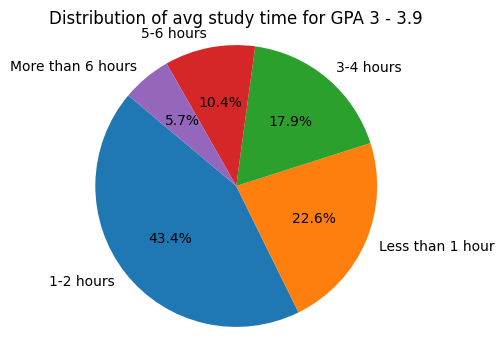

In [16]:
df2 = df[df['GPA'].str.contains('3.0 - 3.9', na=False) & ~pd.isna(df['Avg_Study_time_per_day'])]
df2 = df2[['GPA', 'Avg_Study_time_per_day']]
avgstudy_counts = df2['Avg_Study_time_per_day'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))  # Define the figure size
plt.pie(avgstudy_counts, labels=avgstudy_counts.index, autopct='%1.1f%%', startangle=140)  # Plot the pie chart
plt.title('Distribution of avg study time for GPA 3 - 3.9')  # Add title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [17]:
avgstudytime = 0.434 * 1.5 + 0.226 * 0.5 + 0.179 * 3.5 + 5.5 * 0.104 + 7 * 0.057
avgstudytime
for i in null_study:
    df.loc[i,'Avg_Study_time_per_day'] = '2-3 hours'


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 208
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   University                     208 non-null    object
 1   Degree                         208 non-null    object
 2   Avg_Attendance                 208 non-null    object
 3   Avg_Study_time_per_day         208 non-null    object
 4   Extracurricular_Activities     208 non-null    object
 5   Avg_sleep_time                 208 non-null    object
 6   Household_Size                 208 non-null    object
 7   Workout                        208 non-null    object
 8   Free_time_Activity             208 non-null    object
 9   University_society_member      208 non-null    object
 10  Parents_Highest_Qaulification  208 non-null    object
 11  GPA                            208 non-null    object
 12  field                          208 non-null    object
dtypes: object(

In [19]:
df.to_csv('student life data(Wrangled).csv')